In [2]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt

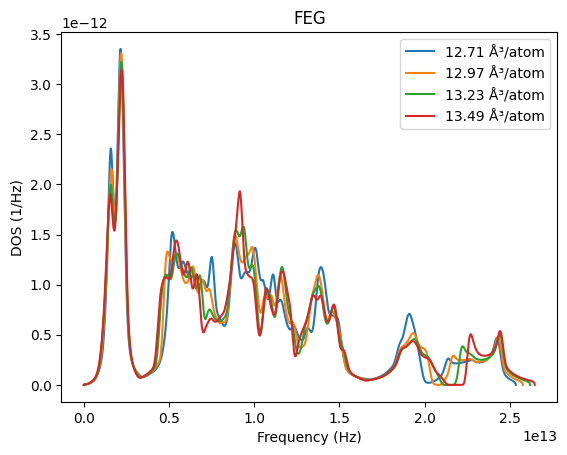

In [10]:
# Plot and compare phonon DOS

# Read in data
vdos_1 = np.loadtxt('with_dipole/scaled_phonon_dos/vdos_1.00')
vdos_2 = np.loadtxt('with_dipole/scaled_phonon_dos/vdos_2.00')
vdos_3 = np.loadtxt('with_dipole/scaled_phonon_dos/vdos_3.00')
vdos_4 = np.loadtxt('with_dipole/scaled_phonon_dos/vdos_4.00')

# Plot data
plt.plot(vdos_1[:,0], vdos_1[:,1], label='12.71' + ' Å³/atom')
plt.plot(vdos_2[:,0], vdos_2[:,1], label='12.97' + ' Å³/atom')
plt.plot(vdos_3[:,0], vdos_3[:,1], label='13.23' + ' Å³/atom')
plt.plot(vdos_4[:,0], vdos_4[:,1], label='13.49' + ' Å³/atom')
plt.xlabel('Frequency (Hz)')
plt.ylabel('DOS (1/Hz)')
plt.legend()
plt.title('FEG')

# Save a high resolution image
plt.savefig('FEG_phonon_dos.png', dpi=300)

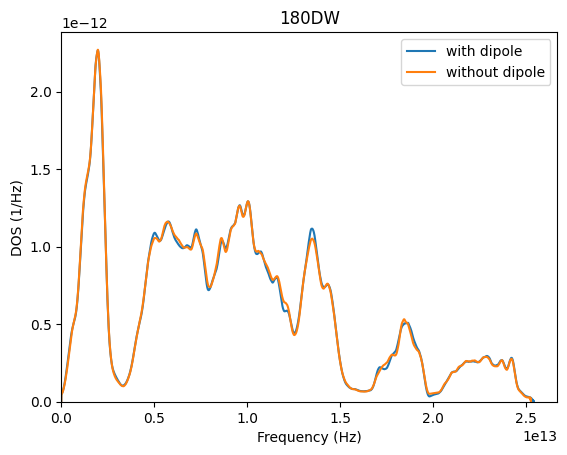

In [118]:
# Plot and compare the phonon DOS with and without the dipole correction

# Read in data
with_dipole = np.loadtxt('180DW/with_dipole/scaled_phonon_dos/vdos_3.00')
without_dipole = np.loadtxt('180DW/without_dipole/scaled_phonon_dos/vdos_3.00')

# Plot the data
plt.plot(with_dipole[:,0], with_dipole[:,1], label='with dipole')
plt.plot(without_dipole[:,0], without_dipole[:,1], label='without dipole')
plt.xlabel('Frequency (Hz)')
plt.ylabel('DOS (1/Hz)')
plt.legend()
plt.xlim(0)
plt.ylim(0)        
plt.title('180DW')

# Save a high resolution image
plt.savefig('180DW_phonon_dos_with_and_without_dipole.png', dpi=300)

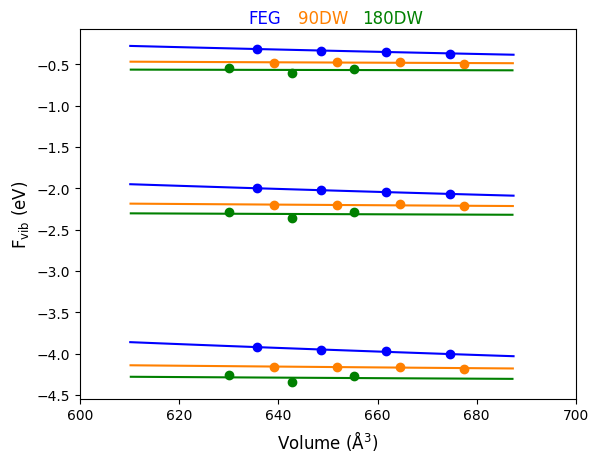

In [84]:
# Plot Fvib vs. volume for fixed T

# Read in data
out1_fvib = np.loadtxt('out1_fvib')
out1_fvib_fit = np.loadtxt('out1_fvib_fit')
out1_volume_structures = np.loadtxt('out1_volume_structures')
out1_volume_structures_fit = np.loadtxt('out1_volume_structures_fit')
out2_fvib = np.loadtxt('out2_fvib')
out2_fvib_fit = np.loadtxt('out2_fvib_fit')
out2_volume_structures = np.loadtxt('out2_volume_structures')
out2_volume_structures_fit = np.loadtxt('out2_volume_structures_fit')
out3_fvib = np.loadtxt('out3_fvib')
out3_fvib_fit = np.loadtxt('out3_fvib_fit')
out3_volume_structures = np.loadtxt('out3_volume_structures')
out3_volume_structures_fit = np.loadtxt('out3_volume_structures_fit')

T = [39, 49, 59]
plt.plot(out1_volume_structures[:, T]*50, out1_fvib[:, T]*50, 'bo')
plt.plot(out1_volume_structures_fit[6:-20, T]*50, out1_fvib_fit[6:-20, T]*50, 'b')

plt.plot(out2_volume_structures[:, T]*50, out2_fvib[:, T]*50, 'o', color=(1, 0.5, 0))
plt.plot(out2_volume_structures_fit[3:-23, T]*50, out2_fvib_fit[3:-23, T]*50, '-', color=(1, 0.5, 0))

plt.plot(out3_volume_structures[:, T]*50, out3_fvib[:, T]*50, 'go')
plt.plot(out3_volume_structures_fit[13:-1, T]*50, out3_fvib_fit[13:-1, T]*50, 'g')
plt.xlabel(r'Volume (Å$^3$)', fontsize=12)
plt.ylabel(r'$\mathrm{F_{vib}}$ (eV)', fontsize=12)
plt.xlim(600, 700)

# Add text labels
plt.text(634, 0, 'FEG', color='blue', fontsize=12)
plt.text(644, 0, '90DW', color=(1, 0.5, 0), fontsize=12)
plt.text(657, 0, '180DW', color='green', fontsize=12)

# Save a high resolution image
plt.savefig('Fvib_vs_volume.png', dpi=300)
plt.show()

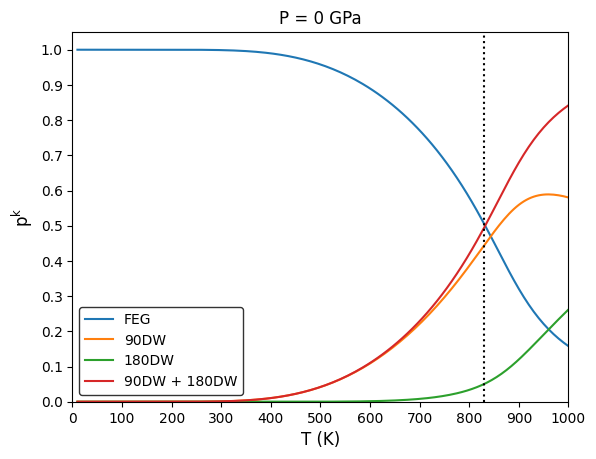

In [4]:
# Plot zentropy properties
# [Tdir, v0, f0, s0, cv0, bb0*changeunit, sconf0, cvconf0, bconf0*changeunit, te0, cp0, cpconf0, frac]

zentropy_properties = np.loadtxt('property_PF')

# Plot the results
plt.plot(zentropy_properties[:,0], zentropy_properties[:,12], label='FEG')
plt.plot(zentropy_properties[:,0], zentropy_properties[:,13], label='90DW')
plt.plot(zentropy_properties[:,0], zentropy_properties[:,14], label='180DW')
plt.plot(zentropy_properties[:,0], zentropy_properties[:,13]+zentropy_properties[:,14], label='90DW + 180DW')
plt.legend(edgecolor='black')
plt.xlabel('T (K)', fontsize=12)
plt.ylabel(r'$\mathrm{p^{k}}$', fontsize=12)
plt.xlim(0, 1000)
plt.ylim(0)
plt.title('P = 0 GPa')

xlim = plt.gca().get_xlim()
ticks = np.arange(np.floor(xlim[0]), np.ceil(xlim[1])+100, 100)
plt.xticks(ticks);

ylim = plt.gca().get_ylim()
ticks = np.arange(0, 1.1, 0.1)
plt.yticks(ticks);

plt.axvline(x=830, color='black', linestyle=':')

# Save a high resolution image
plt.savefig('probability_vs_T.png', dpi=300)

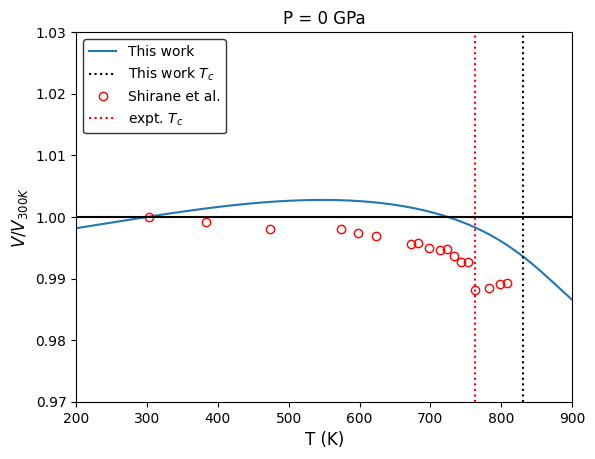

In [13]:
# Plot equilibrium volume vs T
plt.plot(zentropy_properties[:,0], zentropy_properties[:,1]/zentropy_properties[58,1], label = 'This work')
plt.axvline(x=830, color='black', linestyle=':', label = r'This work $\mathrm{T_{c}}$')

expt_T = np.array([303.15, 383.15, 473.15, 573.15, 598.15, 623.15, 673.15, 683.15, 698.15, 713.15, 723.15, 733.15, 743.15, 753.15, 763.15, 783.15, 798.15, 808.15])
expt_v = np.array([62.77, 62.72, 62.65, 62.65, 62.61, 62.58, 62.49, 62.5, 62.45, 62.43, 62.44, 62.37, 62.31, 62.31, 62.03, 62.05, 62.09, 62.1])
plt.plot(expt_T, expt_v/expt_v[0], 'o', color='red', markerfacecolor='none', label = 'Shirane et al.')
plt.axvline(x=763, color='red', linestyle=':', label = r'expt. $\mathrm{T_{c}}$')

plt.xlim(200, 900)
plt.title('P = 0 GPa')
xlim = plt.gca().get_xlim()
ticks = np.arange(np.floor(xlim[0]), np.ceil(xlim[1])+100, 100)
plt.xticks(ticks);
plt.ylim(0.97, 1.03)

plt.xlabel('T (K)', fontsize=12)
#plt.ylabel(r'Unit Cell Volume ($\mathrm{\AA^3}$)', fontsize=12);
plt.ylabel(r'$V/V_{300 K}$', fontsize=12);

# Plot a black horizontal line at y=1
plt.axhline(y=1, color='black')
plt.legend(edgecolor='black')
# Save a high resolution image
plt.savefig('volume_vs_T.png', dpi=300)

(0.008, 0.014)

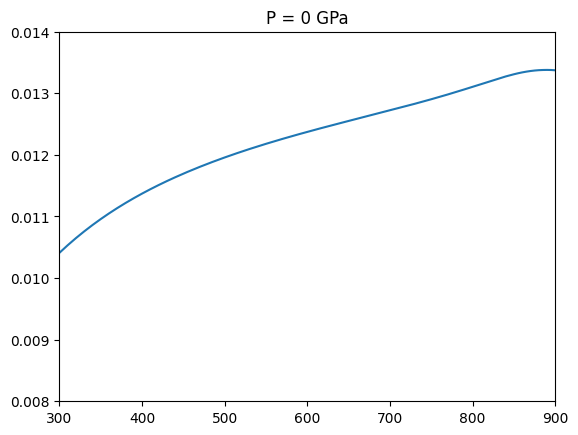

In [6]:
# [Tdir, v0, f0, s0, cv0, bb0*changeunit, sconf0, cvconf0, bconf0*changeunit, te0, cp0, cpconf0, frac]
# Plot equilibrium cp vs T
plt.plot(zentropy_properties[:,0], zentropy_properties[:,10])
plt.xlim(300, 900)
plt.title('P = 0 GPa')
xlim = plt.gca().get_xlim()
ticks = np.arange(np.floor(xlim[0]), np.ceil(xlim[1])+100, 100)
plt.xticks(ticks);
plt.ylim(0.008, 0.014)

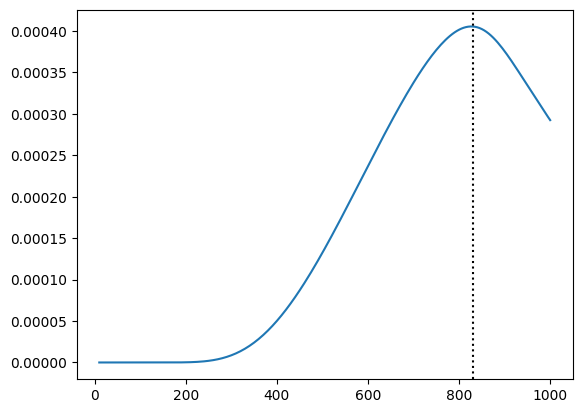

In [8]:
plt.plot(zentropy_properties[:,0], zentropy_properties[:,7])
plt.axvline(x=830, color='black', linestyle=':')

In [16]:
print(zentropy_properties[58:,0])

[ 300.  305.  310.  315.  320.  325.  330.  335.  340.  345.  350.  355.
  360.  365.  370.  375.  380.  385.  390.  395.  400.  405.  410.  415.
  420.  425.  430.  435.  440.  445.  450.  455.  460.  465.  470.  475.
  480.  485.  490.  495.  500.  505.  510.  515.  520.  525.  530.  535.
  540.  545.  550.  555.  560.  565.  570.  575.  580.  585.  590.  595.
  600.  605.  610.  615.  620.  625.  630.  635.  640.  645.  650.  655.
  660.  665.  670.  675.  680.  685.  690.  695.  700.  705.  710.  715.
  720.  725.  730.  735.  740.  745.  750.  755.  760.  765.  770.  775.
  780.  785.  790.  795.  800.  805.  810.  815.  820.  825.  830.  835.
  840.  845.  850.  855.  860.  865.  870.  875.  880.  885.  890.  895.
  900.  905.  910.  915.  920.  925.  930.  935.  940.  945.  950.  955.
  960.  965.  970.  975.  980.  985.  990.  995. 1000.]
